# KNN - Hyperparameter Optimization

___
Prepared by [Ali Rifat Kaya](https://www.linkedin.com/in/alirifatkaya/)
___
Codes for the functions used in this notebook can be downloaded from [my_module.py](my_module.py) file.
* `pr_auc_score`
* `scoring_functions`
* `do_cross_validation`
* `plot_confusion_matrix`
* `plot_precision_recall_curve`
* `plot_roc_curve`
* `calculate_statistics`
* `make_df_statistics`
* `train_model`
* `test_model`
___

# Table of Contents

1. [Import Libraries & Read Data](#Import-Libraries-&-Read-Data)
2. [Cross-Validation](#Cross-Validation)
3. [Score Summary](#Score-Summary)
4. [ROC Plots](#ROC-Plots)
5. [Precision-Recall Plots](#Precision-Recall-Plots)

# Import Libraries & Read Data

In [1]:
# import modules
from IPython.core.display import display, HTML
from my_module import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import warnings

# ignore warnings
warnings.filterwarnings('ignore')
# wider jupyter notebook
display(HTML('<style>.container { width:80% !important; }</style>'))

In [2]:
# reads data into a dataframe
raw_data = pd.read_csv('creditcard_new.csv', header=0)
# copy data into another dataframe by keeping the original safe
df = raw_data.copy()
# input matrix and target array
X = df.drop(['Class', 'Hours'], axis=1).values  # define the input matrix
y = df.Class.values  # the label array (classes)
# split the data into the training data (70%) and the test data (30%)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=1)

In [3]:
print(('Training data has {} fraudulent transactions.'.format(y_train.sum())))
print(('Test data has {} fradulent transactions.'.format(y_test.sum())))
print(('\nDistribution of positive class in training data: {}'.format(
    round((y_train[y_train == 1].size/y_train.size), 4))))
print(('Distribution of positive class in test data: {}'.format(
    round((y_test[y_test == 1].size/y_test.size), 4))))

Training data has 337 fraudulent transactions.
Test data has 128 fradulent transactions.

Distribution of positive class in training data: 0.0017
Distribution of positive class in test data: 0.0015


* We have the same approximately the positive class distribution both in the training and the test data.
* This will help us to have a stable performance of the evaluation metrics.
* Set the test set aside for final evaluation.

In [4]:
# Cross validation object -> 5-fold cross-validation
cv = StratifiedKFold(n_splits=5,
                     shuffle=True,
                     random_state=1)

# Cross Validation 

In [5]:
# hyperparameters for KNN algorithm
knn1 = KNeighborsClassifier(n_neighbors=1)
knn2 = KNeighborsClassifier(n_neighbors=2)
knn3 = KNeighborsClassifier(n_neighbors=3)
knn5 = KNeighborsClassifier(n_neighbors=5)
knn7 = KNeighborsClassifier(n_neighbors=7)
knn10 = KNeighborsClassifier(n_neighbors=10)
knn15 = KNeighborsClassifier(n_neighbors=15)
knn20 = KNeighborsClassifier(n_neighbors=20)

estimators = [('KNN (k=1)', knn1), ('KNN (k=2)', knn2), ('KNN (k=3)', knn3),
              ('KNN (k=5)', knn5), ('KNN (k=7)', knn7), ('KNN (k=10)', knn10),
              ('KNN (k=15)', knn15), ('KNN (k=20)', knn20)]
scalers = [True] * 8
sleep_time=300
knn_cv_results = do_cross_validation(X=X_train,
                                     y=y_train,
                                     estimators=estimators,
                                     cv=cv,
                                     scalers=scalers,
                                     prints=True,
                                     sleep_time=sleep_time)

Fold 1:

Number of Observations in the Training Data: 158469
Number of Observations in the Validation Data: 39618:

KNN (k=1)
---------------------------------------------------------------------------------
Training data AUCPR score: 1.0
Validation data AUCPR score: 0.8063264199846503

Training data AUCROC score: 1.0
Validation data AUCROC score: 0.8969071168290325
---------------------------------------------------------------------------------
There are 68 fraudulent transactions in the validation set
54 out of 66 predicted fraudulent transactions are true fraudulent transactions

sleeping... 300 seconds

KNN (k=2)
---------------------------------------------------------------------------------
Training data AUCPR score: 0.9900116405692614
Validation data AUCPR score: 0.8425711731833685

Training data AUCROC score: 0.9999812481494884
Validation data AUCROC score: 0.9043143452071095
---------------------------------------------------------------------------------
There are 68 fraudu

sleeping... 300 seconds

KNN (k=20)
---------------------------------------------------------------------------------
Training data AUCPR score: 0.892647689135025
Validation data AUCPR score: 0.8402329110327418

Training data AUCROC score: 0.9996321652982672
Validation data AUCROC score: 0.9407953446865472
---------------------------------------------------------------------------------
There are 68 fraudulent transactions in the validation set
52 out of 63 predicted fraudulent transactions are true fraudulent transactions

sleeping... 300 seconds

Fold 3:

Number of Observations in the Training Data: 158470
Number of Observations in the Validation Data: 39617:

KNN (k=1)
---------------------------------------------------------------------------------
Training data AUCPR score: 1.0
Validation data AUCPR score: 0.8471071478370095

Training data AUCROC score: 1.0
Validation data AUCROC score: 0.910346623393777
-----------------------------------------------------------------------------


KNN (k=15)
---------------------------------------------------------------------------------
Training data AUCPR score: 0.9134046761132025
Validation data AUCPR score: 0.8043063280173016

Training data AUCROC score: 0.9997605703048179
Validation data AUCROC score: 0.9174987263430006
---------------------------------------------------------------------------------
There are 67 fraudulent transactions in the validation set
48 out of 56 predicted fraudulent transactions are true fraudulent transactions

sleeping... 300 seconds

KNN (k=20)
---------------------------------------------------------------------------------
Training data AUCPR score: 0.8985264763887709
Validation data AUCPR score: 0.8134336407957635

Training data AUCROC score: 0.9996866601114389
Validation data AUCROC score: 0.9249174481574429
---------------------------------------------------------------------------------
There are 67 fraudulent transactions in the validation set
47 out of 55 predicted fraudulent transacti

# Score Summary

In [6]:
# results as a pickle file
pickle.dump(knn_cv_results, open('knn_cv_results.pickle', 'wb'))
# calculates mean and standard deviation for cross validation scores
mean_scores, std_devs = calculate_statistics(knn_cv_results)
# puts the mean scores in a dataframe
df_mean = make_df_statistics(mean_scores)
# puts the standard deviations in a dataframe
df_std = make_df_statistics(std_devs)
df_stats = df_mean.merge(df_std, left_index=True, right_index=True, suffixes=(
    '_mean', '_std'))  # merge mean and standard deviations dataframes
df_stats = df_stats[['matthews_corrcoef_mean', 'pr_auc_score_mean',
                     'matthews_corrcoef_std', 'pr_auc_score_std']]
df_stats

,matthews_corrcoef_mean,pr_auc_score_mean,matthews_corrcoef_std,pr_auc_score_std
KNN (k=1),0.833140,0.835965,0.032327,0.031120
KNN (k=2),0.828388,0.854625,0.023966,0.023608
KNN (k=3),0.844497,0.855588,0.016408,0.023487
KNN (k=5),0.824785,0.852010,0.023925,0.033320
KNN (k=7),0.809917,0.838791,0.021278,0.031166
KNN (k=10),0.793504,0.834486,0.023934,0.022231
KNN (k=15),0.780950,0.823934,0.047715,0.014311
KNN (k=20),0.779274,0.819142,0.036456,0.017542


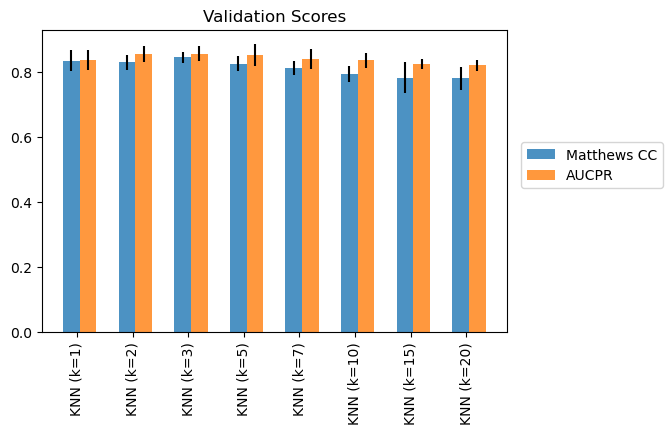

In [7]:
fig, ax = plt.subplots()  # generates figure and axes object
fig.set_dpi(100)  # set the resolution of the plot
width = 0.3  # set bar width
idx = np.arange(
    df_stats.shape[0])  # number of ticks for x-axis and bar location
ax.bar(idx, df_stats.matthews_corrcoef_mean, width,
       yerr=df_stats.matthews_corrcoef_std, align='center',
       alpha=0.8, ecolor='black')  # plots matthews correlation coef.
ax.bar(idx + width, df_stats.pr_auc_score_mean, width,
       yerr=df_stats.pr_auc_score_std, align='center',
       alpha=0.8, ecolor='black')  # plots AUCPR
ax.set_xticks(idx + 0.1)  # adjust the position of xticks
ax.set_xticklabels(df_stats.index, rotation=90)  # changes the tick labels
ax.legend(['Matthews CC', 'AUCPR'],
          bbox_to_anchor=(1.35, 0.65))  # set the legend
ax.set_title('Validation Scores')
plt.show()  # shows the plot

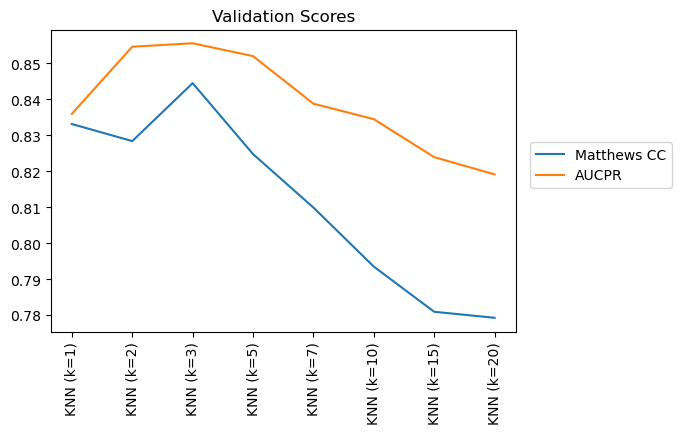

In [8]:
fig, ax = plt.subplots()
fig.set_dpi(100)  # set the resolution of the plot
ax.plot(df_stats.matthews_corrcoef_mean)
ax.plot(df_stats.pr_auc_score_mean)
ax.set_xticklabels(df_stats.index, rotation=90)  # changes the tick labels
ax.legend(['Matthews CC', 'AUCPR'],
          bbox_to_anchor=(1.35, 0.65))  # set the legend
ax.set_title('Validation Scores')
plt.show()  # shows the plot

# ROC Plots

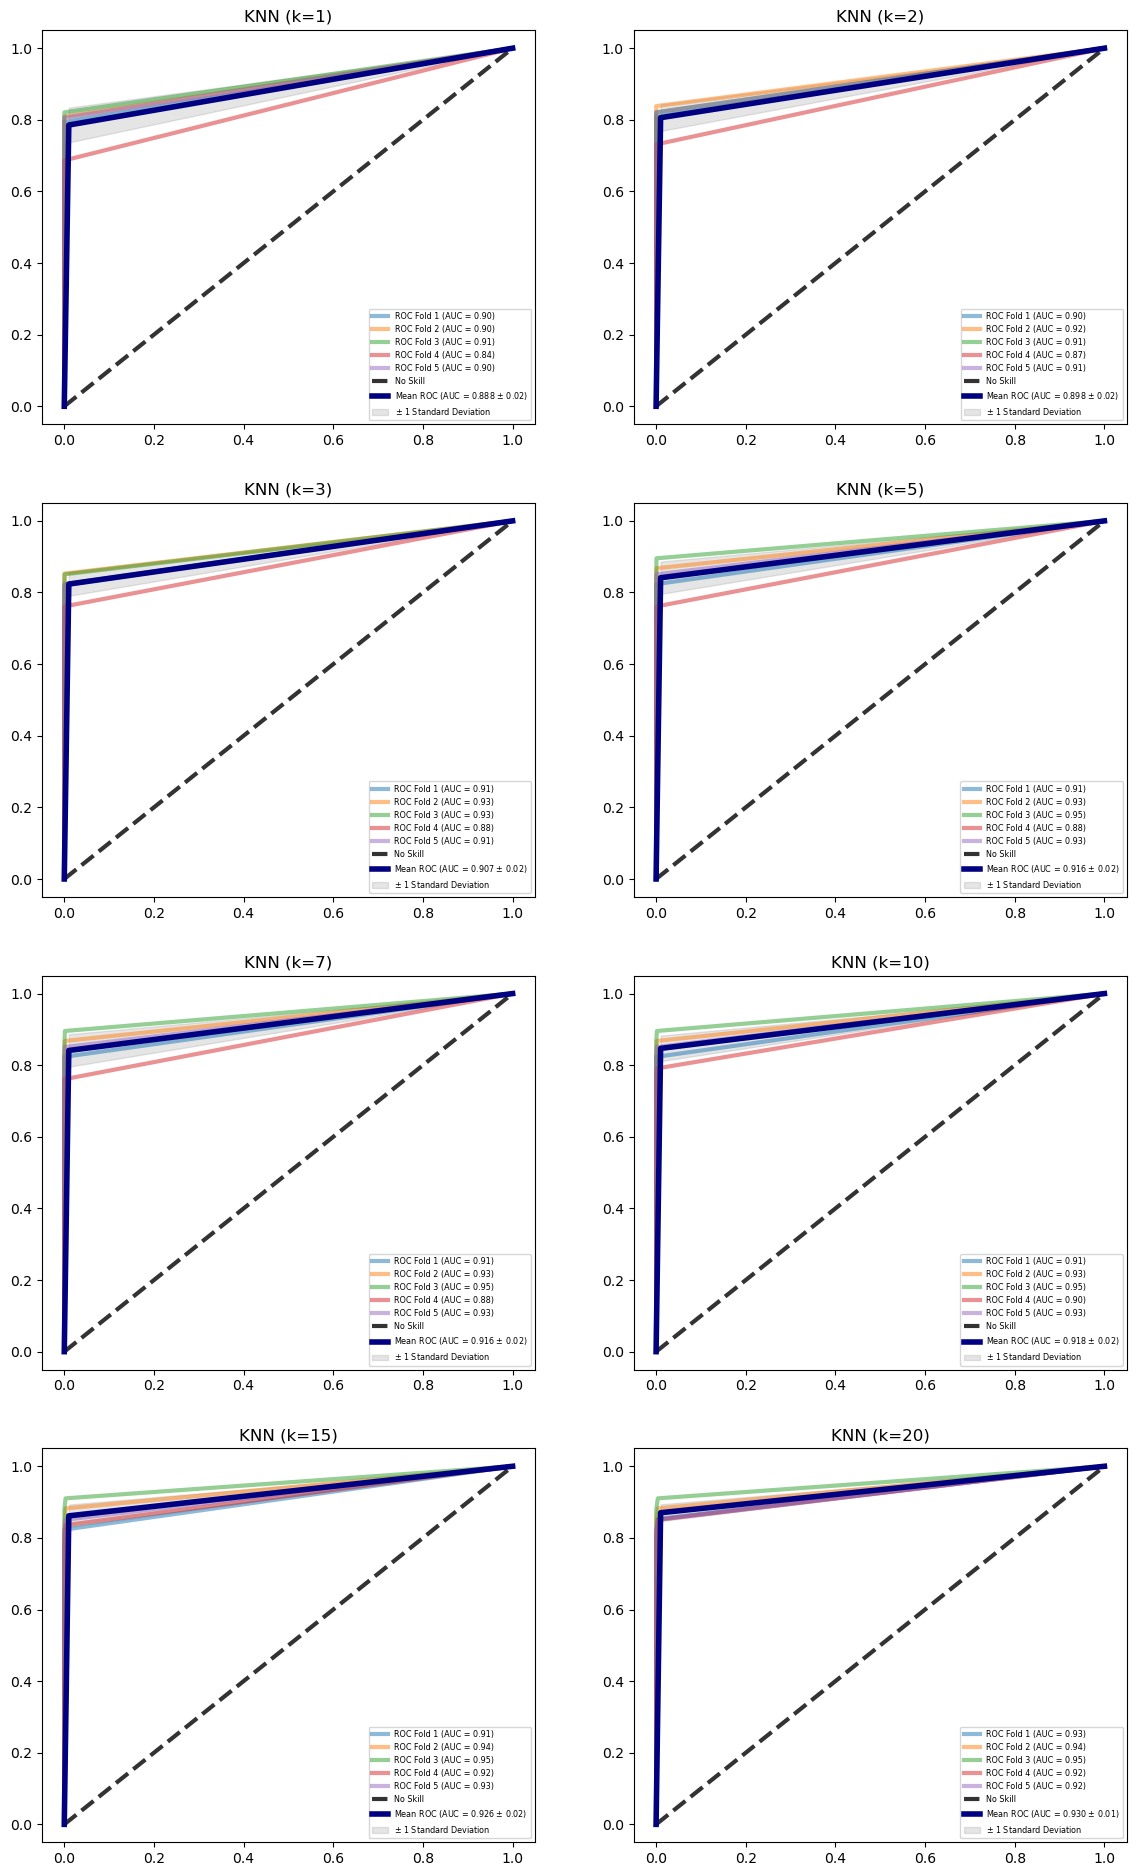

In [9]:
# plot for roc curves - 10 subplots
fig, axes = plt.subplots(4, 2, figsize=(14, 24))
fig.set_dpi(100)  # set the resolution of the plot
axes = axes.ravel()  # flattens the axes list
# plots roc curves
for idx, (model, results) in enumerate(knn_cv_results.items()):
    plot_roc_curve(results['fprs'],
                   results['tprs'], title=model, ax=axes[idx])
plt.show()

# Precision-Recall Plots

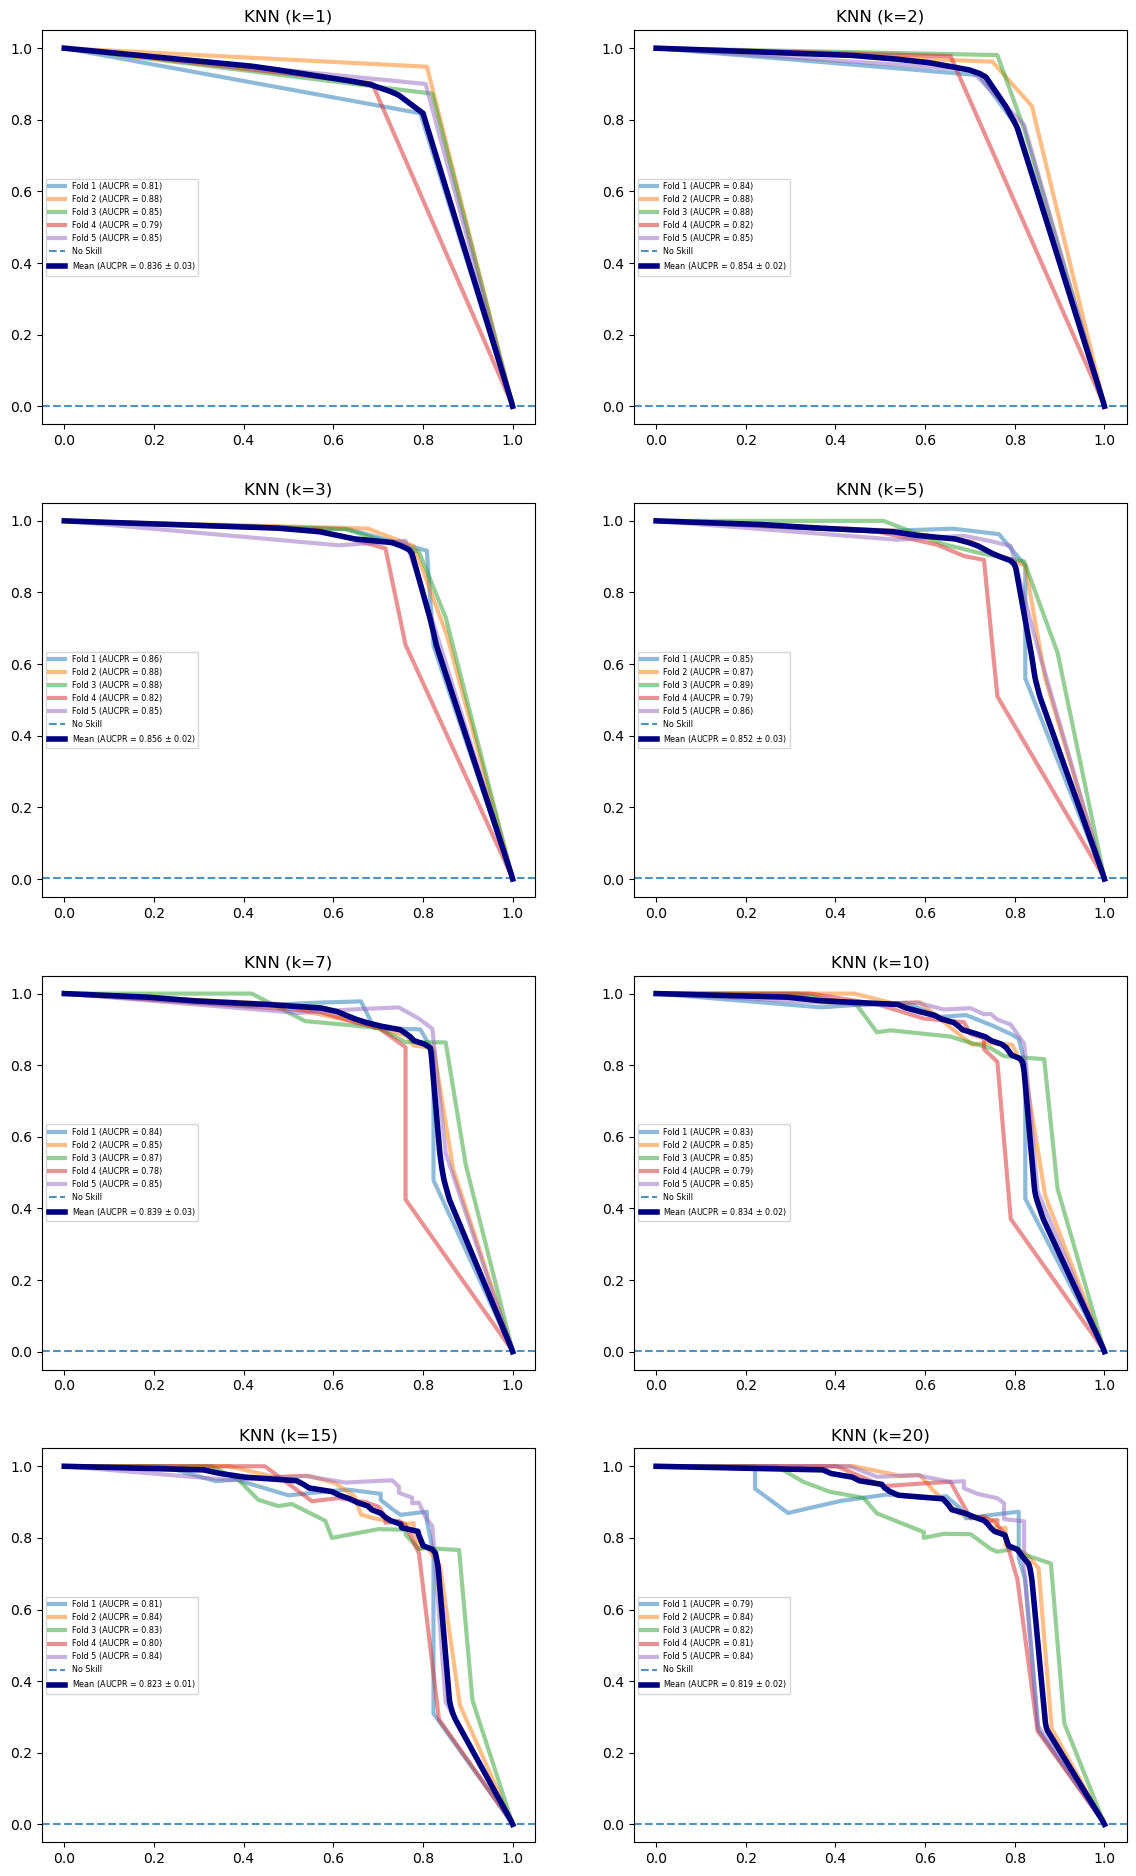

In [10]:
fig, axes = plt.subplots(4, 2, figsize=(14, 24))
fig.set_dpi(100)
axes = axes.ravel()
for idx, (model, results) in enumerate(knn_cv_results.items()):
    plot_precision_recall_curve(y_train, results['precisions'],
                                results['recalls'], title=model, ax=axes[idx])
plt.show()

* The values $2, 3$ and $5$, for $k$, have very close __AUCPR__ scores; however the difference in __MatthewsCC__ is much bigger. Based on two metrics, I believe that $k=3$ is the best parameter. It is also has the hihgest score for both metrics and the lowest variation.  